<a href="https://colab.research.google.com/github/ABUALHUSSEIN/Udacity-project/blob/main/House_Price_Prediction6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##House Price Prediction

The goal : Training a model that can predict the price of a new house

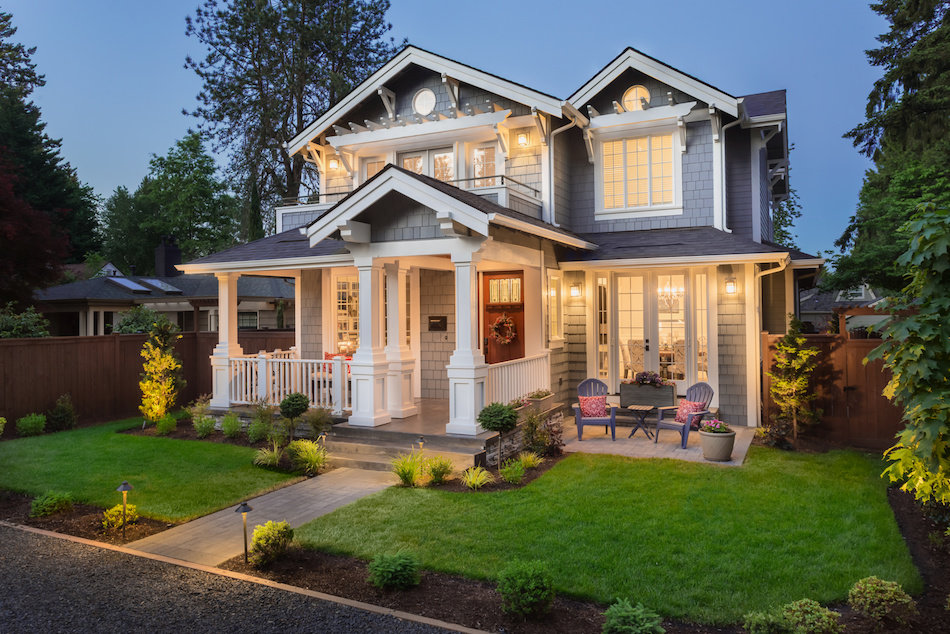

In [2]:
from IPython import display
display.Image("https://www.justinhavre.com/uploads/agent-1/sell-home-in-slow-market.jpg")

##Phase 1 : Cleaning & understanding the data

Importing the packages

In [258]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Importing data

In [210]:

url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
housing= pd.read_csv(url)

In [211]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [259]:
housing.tail(10).style.background_gradient(cmap='Blues')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.320000,39.290000,11.000000,2640.000000,505.000000,1257.000000,445.000000,3.567300,112000.000000,1
20631,-121.400000,39.330000,15.000000,2655.000000,493.000000,1200.000000,432.000000,3.517900,107200.000000,1
20632,-121.450000,39.260000,15.000000,2319.000000,416.000000,1047.000000,385.000000,3.125000,115600.000000,1
20633,-121.530000,39.190000,27.000000,2080.000000,412.000000,1082.000000,382.000000,2.549500,98300.000000,1
20634,-121.560000,39.270000,28.000000,2332.000000,395.000000,1041.000000,344.000000,3.712500,116800.000000,1
20635,-121.090000,39.480000,25.000000,1665.000000,374.000000,845.000000,330.000000,1.560300,78100.000000,1
20636,-121.210000,39.490000,18.000000,697.000000,150.000000,356.000000,114.000000,2.556800,77100.000000,1
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.000000,433.000000,1.700000,92300.000000,1
20638,-121.320000,39.430000,18.000000,1860.000000,409.000000,741.000000,349.000000,1.867200,84700.000000,1
20639,-121.240000,39.370000,16.000000,2785.000000,616.000000,1387.000000,530.000000,2.388600,89400.000000,1


In [260]:
# shape of data
housing.shape

(20640, 10)

10 features

In [261]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [262]:
# examine the data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int8   
dtypes: float64(9), int8(1)
memory usage: 1.4 MB


<p>total observations: 20640</p>
<p>total columns (features): 10</p>
<p>data type of each feature: 9 numbers and 1 object. In this dataset, you can see the ocean_proximity feature is text (will handle later)</p>
total_bedrooms is 20433, which indicates null values - (will handle later).

In [263]:
#nan value checking
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [264]:
housing.fillna(method="ffill", inplace=True)

In [265]:
# na value checking after forward fill
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [266]:
# Remove duplicates from the DataFrame
housing_cleaned = housing.drop_duplicates()

# Verify the number of duplicates removed
num_duplicates_removed = len(housing) - len(housing_cleaned)
print("Number of duplicates removed:", num_duplicates_removed)

Number of duplicates removed: 0


##phase2 : Data Exploration and Preliminary Analysis

In [267]:
housing.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20640.000000,537.642151,420.876678,1.000000,296.000000,435.000000,647.000000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
ocean_proximity,20640.000000,1.165843,1.420662,0.000000,0.000000,1.000000,1.000000,4.000000


In [268]:
housing['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [269]:
housing["ocean_proximity"].describe()

count    20640.000000
mean         1.165843
std          1.420662
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: ocean_proximity, dtype: float64

Inspecting the distributions

<Figure size 1600x400 with 0 Axes>

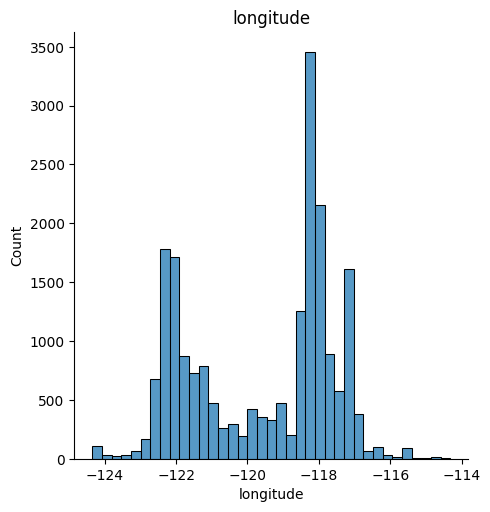

<Figure size 1600x400 with 0 Axes>

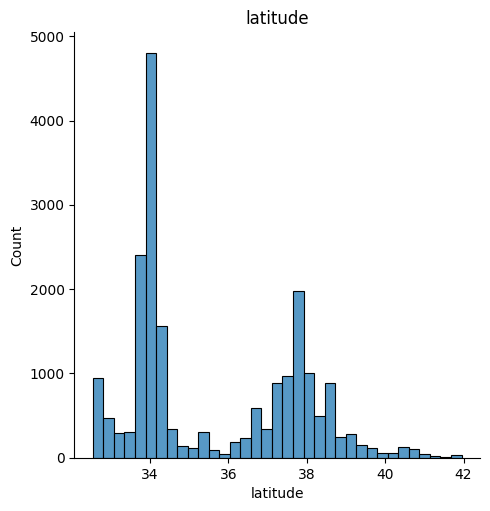

<Figure size 1600x400 with 0 Axes>

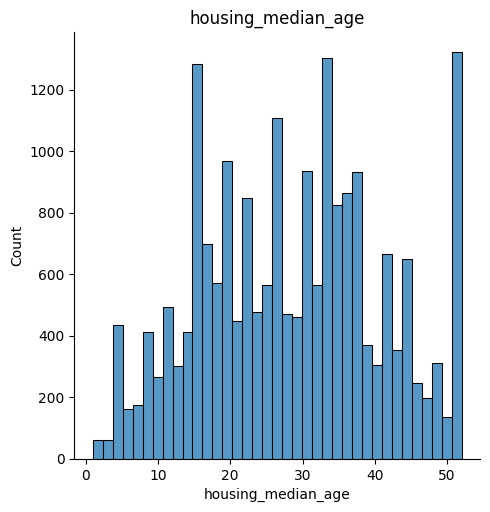

<Figure size 1600x400 with 0 Axes>

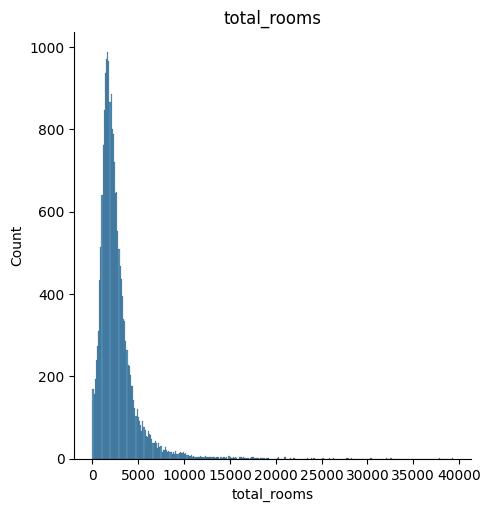

<Figure size 1600x400 with 0 Axes>

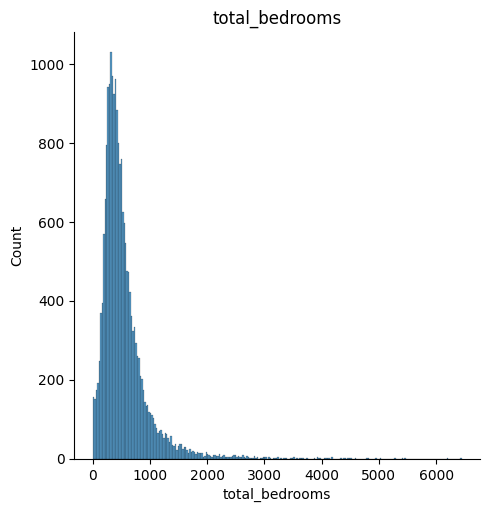

<Figure size 1600x400 with 0 Axes>

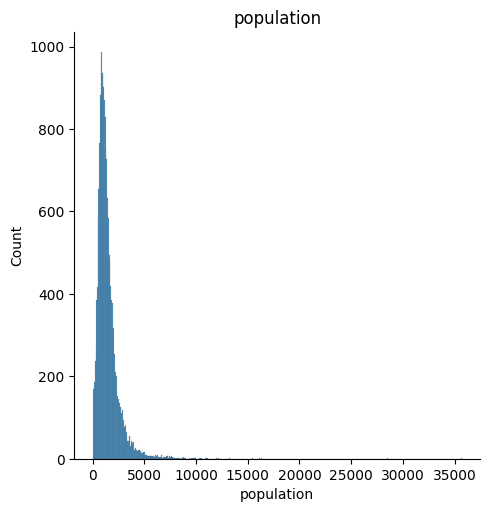

<Figure size 1600x400 with 0 Axes>

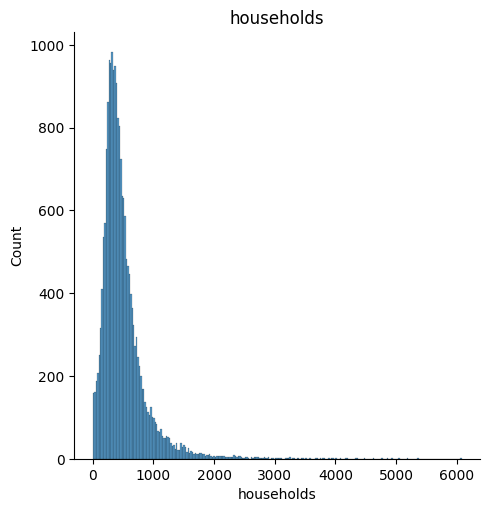

<Figure size 1600x400 with 0 Axes>

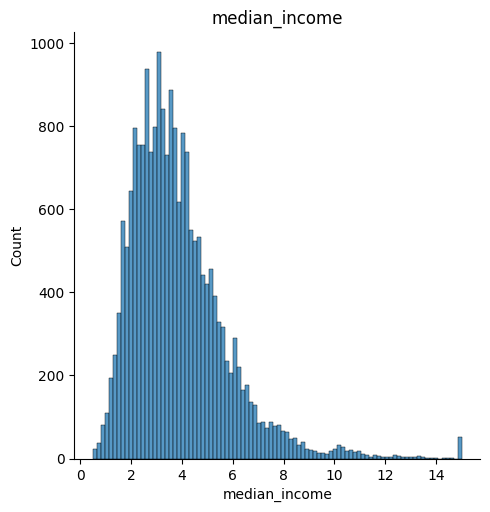

<Figure size 1600x400 with 0 Axes>

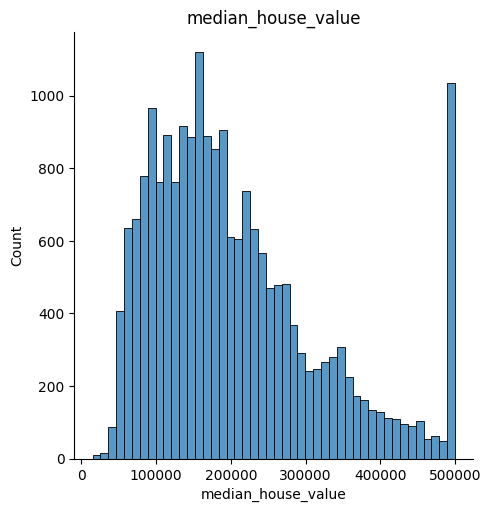

<Figure size 1600x400 with 0 Axes>

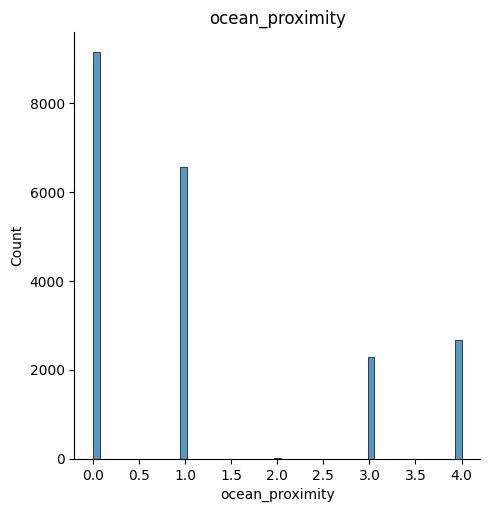

In [270]:
# plot distributions of features, countplot if object, displot if numeric
for feat in housing.columns:
  plt.figure(figsize=(16,4))
  if housing[feat].dtype == 'object':
    sns.countplot(data=housing, x=feat) # for countplot must use data=
  else:
    sns.displot(housing, x=feat)
  plt.title(feat)
  plt.show()

<Axes: >

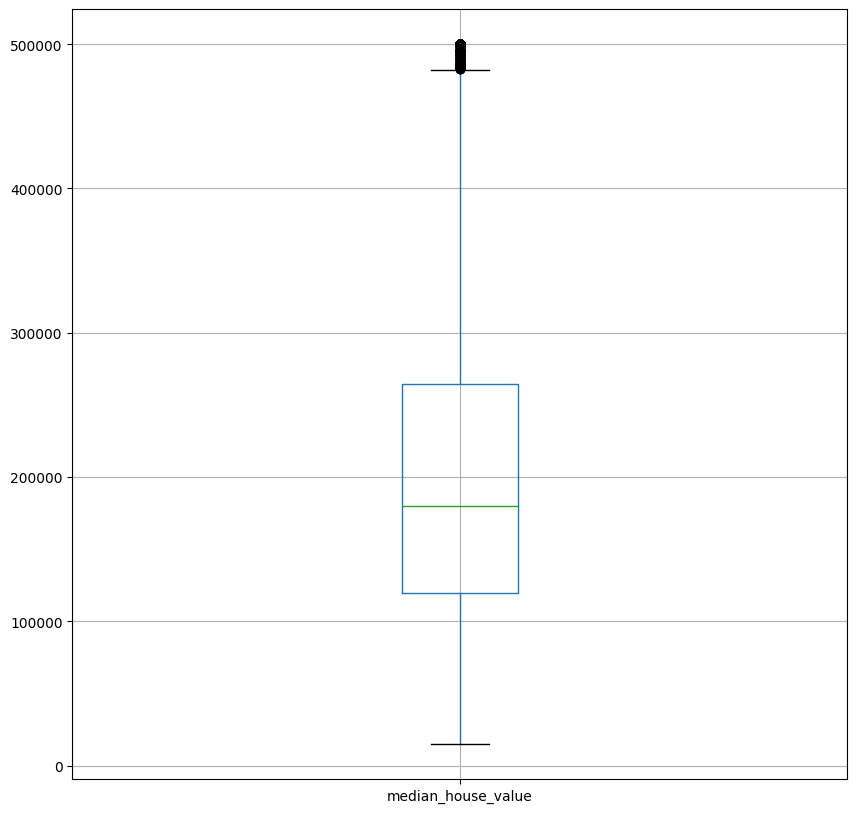

In [271]:

housing.boxplot(['median_house_value'], figsize=(10, 10))


In [272]:
# observe the number of rows where the median_house_value is 0
(housing['median_house_value']==0).sum(0)

0

In [273]:
# Convert ocean_proximity values to categorical integers
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category").cat.codes
housing["ocean_proximity"].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [274]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [275]:
# Find correlataion matrix
housing_corr_matrix = housing.corr(numeric_only=True)
housing_corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,-0.045967,-0.289779
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.144160,0.200974
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.105623,0.112468
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,0.134153,-0.015693
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.049294,-0.014702
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,-0.024650,-0.070282
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.065843,-0.018186
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.688075,-0.014957
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049294,-0.024650,0.065843,0.688075,1.000000,0.081750
ocean_proximity,-0.289779,0.200974,0.112468,-0.015693,-0.014702,-0.070282,-0.018186,-0.014957,0.081750,1.000000


#Correlation Target and Continuous
median house value data  is our target variable

In [276]:
# Correlation between median_house_value and other features
housing_corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
ocean_proximity       0.081750
households            0.065843
total_bedrooms        0.049294
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

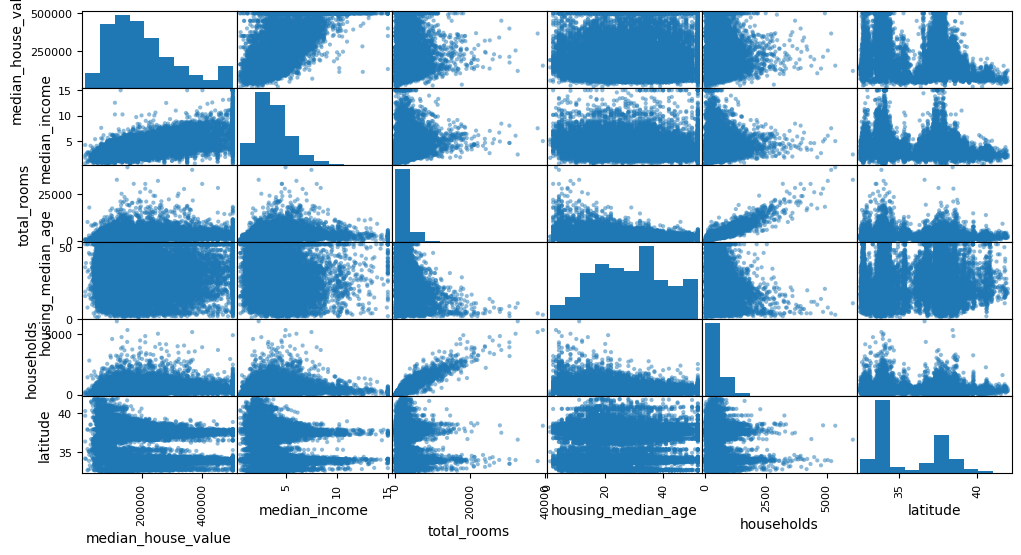

In [277]:
features = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age", "households","latitude"]
# scatter plolt to demonstrate teh correaltion between some of the features
pd.plotting.scatter_matrix(housing[features], figsize=(12, 6))
plt.show()

#HeatMap

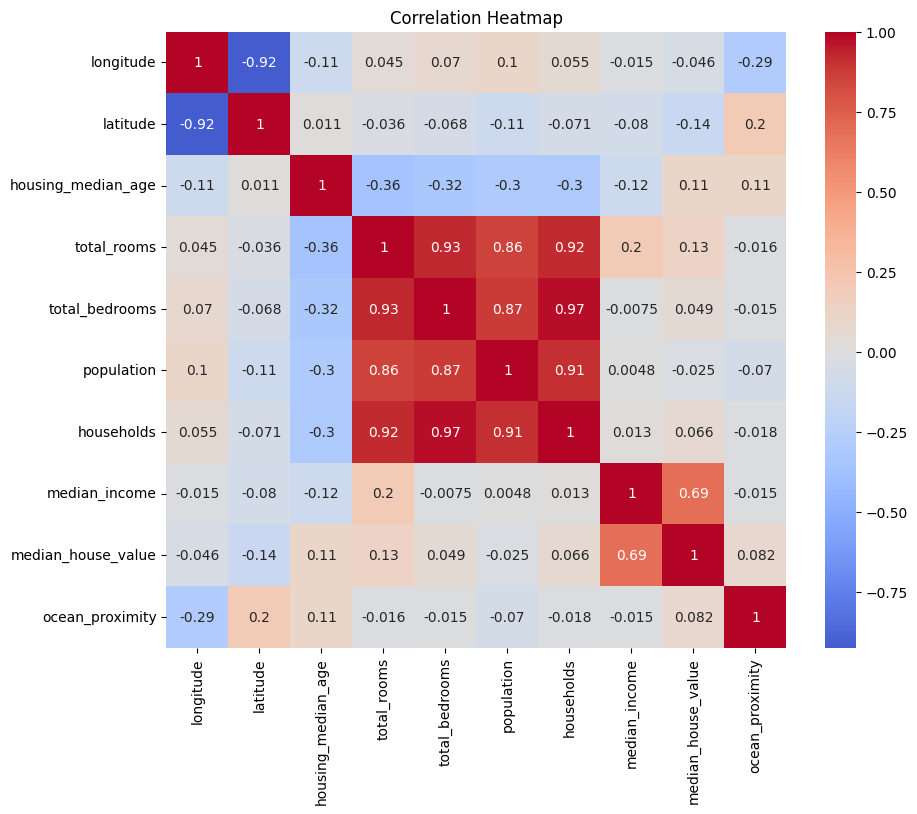

In [278]:

plt.figure(figsize=(10, 8))
sns.heatmap(housing_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


#Split the data into training and testing sets


In [279]:
# Define features (X) and target (y)
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [280]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 9) (16512, 9) (4128, 9)


#Model Training

#LinearRegression

In [281]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [282]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

Evaluation

Prediction on training data

In [283]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [284]:
print(training_data_prediction)

[180251.26434736 285591.79669635 262660.32133103 ... 191658.23537756
 273683.14590437 278123.38816672]


In [285]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.6401079709888612
Mean Absolute Error :  50626.92854302038
Mean squared Error :  4810958229.787788
rmse :  69361.07142906451


Visualizing the actual Prices and predicted prices

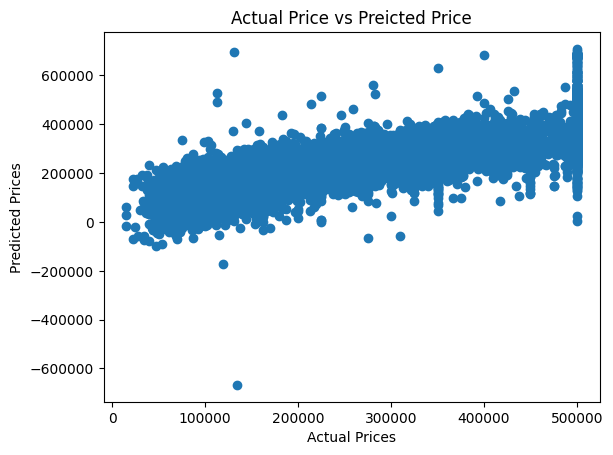

In [286]:

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()


#Prediction on Test Data

In [287]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [288]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.6114554518898516
Mean Absolute Error :  51929.46979152452
Mean squared Error :  5091522642.900918
rmse :  71354.90622866039


XGBoost Regressor

In [289]:
# loading the model
mode2 = XGBRegressor()

In [290]:
# training the model with X_train
mode2.fit(X_train,  y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [291]:
# accuracy for prediction on training data
training_data_prediction = mode2.predict(X_train)

In [292]:
print(training_data_prediction)

[104661.875 323677.25  179459.92  ... 246959.2   283666.56  338796.56 ]


In [295]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error

score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9357383090305479
Mean Absolute Error :  20653.267186896745
Mean squared Error :  859036283.40709
rmse :  29309.320759906564


Visualizing the actual Prices and predicted prices

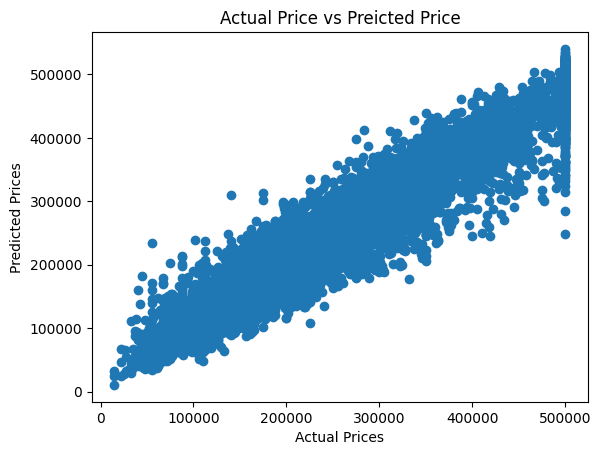

In [294]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data


In [296]:
# accuracy for prediction on test data
test_data_prediction = mode2.predict(X_test)

In [298]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.8228745639267318
Mean Absolute Error :  32235.29883522211
Mean squared Error :  2321067617.052453
rmse :  48177.45963676845


#RandomForestRegressor


In [299]:
mode3 = RandomForestRegressor(n_estimators=50)
mode3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

Evaluation

Prediction on training data

In [300]:
mode3.feature_importances_

array([0.10653817, 0.10828495, 0.05505223, 0.02522105, 0.02436332,
       0.03340906, 0.01944568, 0.51746196, 0.11022359])

In [301]:
feature_importances = mode3.feature_importances_
# Create a DataFrame to associate features with their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

In [302]:
# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the names of the important features
print("Important Features:")
for feature_name in importance_df['Feature']:
    print(feature_name)

Important Features:
median_income
ocean_proximity
latitude
longitude
housing_median_age
population
total_rooms
total_bedrooms
households


In [303]:
# accuracy for prediction on training data
training_data_prediction = mode3.predict(X_train)

In [304]:
print(training_data_prediction)

[107990.   364494.   186390.   ... 224920.02 276576.   314184.02]


In [305]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error

score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9734848317740412
Mean Absolute Error :  12077.873960755815
Mean squared Error :  354448991.6639296
rmse :  18826.815760078218


#Visualizing the actual Prices and predicted prices

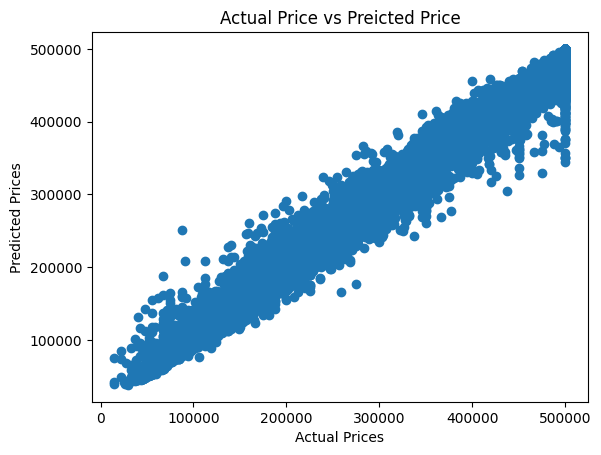

In [306]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#Prediction on Test Data

In [307]:
# accuracy for prediction on test data
test_data_prediction = mode3.predict(X_test)


In [308]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.8072539873681404
Mean Absolute Error :  32290.79108042636
Mean squared Error :  2525761054.7292266
rmse :  50256.950312660505


#Standardization

Feature Scaling Typically, ML algorithms don't perform well when the input numerial attributes have very different scales.

In [309]:
# Define features (X) and target (y)
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [310]:
scaler = StandardScaler().fit(X_train)

In [311]:
print(scaler)

StandardScaler()


In [312]:
scaler.transform(X_train)

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.32290591,
        -0.326196  ,  2.00593172],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.6720272 ,
        -0.03584338,  2.00593172],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.43046109,
         0.14470145,  2.00593172],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.07090859,
        -0.49697313, -0.81854604],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.15490769,
         0.96545045, -0.81854604],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.94776365,
        -0.68544764,  1.29981228]])

In [313]:
X_train_scaled = scaler.transform(X_train)

In [314]:
print(X_train_scaled)

[[ 1.27258656 -1.3728112   0.34849025 ...  0.32290591 -0.326196
   2.00593172]
 [ 0.70916212 -0.87669601  1.61811813 ...  0.6720272  -0.03584338
   2.00593172]
 [-0.44760309 -0.46014647 -1.95271028 ... -0.43046109  0.14470145
   2.00593172]
 ...
 [ 0.59946887 -0.75500738  0.58654547 ...  0.07090859 -0.49697313
  -0.81854604]
 [-1.18553953  0.90651045 -1.07984112 ...  0.15490769  0.96545045
  -0.81854604]
 [-1.41489815  0.99543676  1.85617335 ...  1.94776365 -0.68544764
   1.29981228]]


In [315]:
print(X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [316]:
scaler = StandardScaler().fit(X_test)
scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

In [317]:
print(X_test_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Model Training with Standardization

LinearRegression

In [318]:
# Initialize and train the model
mode4 = LinearRegression()
mode4.fit(X_train_scaled , y_train)

LinearRegression()

Evaluation

Prediction on training data

In [319]:
# accuracy for prediction on training data
training_data_prediction = mode4.predict(X_train_scaled)

In [320]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_train, training_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.6401079709888613
Mean Absolute Error :  50626.928543020585
Mean squared Error :  4810958229.787787
rmse :  69361.0714290645


Visualizing the actual Prices and predicted prices

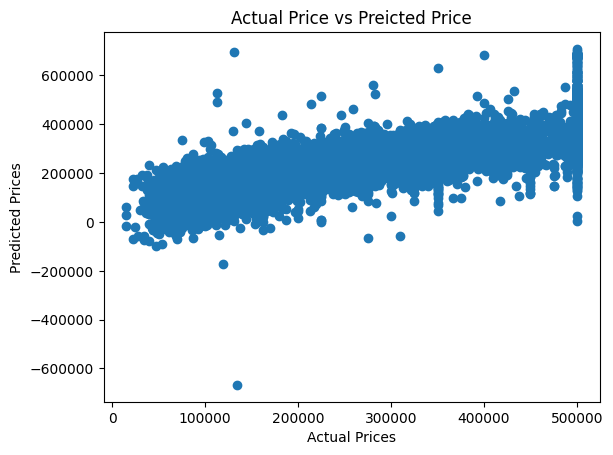

In [321]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [322]:
# accuracy for prediction on test data
test_data_prediction = mode4.predict(X_test_scaled)

In [323]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.6111002995964576
Mean Absolute Error :  52305.93007086632
Mean squared Error :  5096176590.43998
rmse :  71387.51004510508


#XGBoost Regressor

In [342]:
# loading the model
mode5 = XGBRegressor()
# training the model with X_train
mode5.fit(X_train_scaled,  y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on training data

In [343]:
# accuracy for prediction on training data
training_data_prediction = mode5.predict(X_train_scaled)

In [344]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error

score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9357383090305479
Mean Absolute Error :  20653.267186896745
Mean squared Error :  859036283.40709
rmse :  29309.320759906564


Visualizing the actual Prices and predicted prices

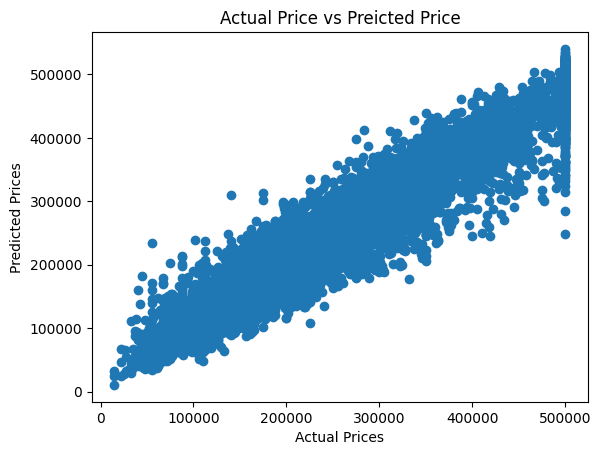

In [345]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [346]:
# accuracy for prediction on test data
test_data_prediction = mode5.predict(X_test_scaled)

In [340]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)





R squared error :  0.7177530656276032
Mean Absolute Error :  42350.47597154721
Mean squared Error :  3698589168.8255873
rmse :  60816.027236457885


RandomForestRegressor

In [347]:
mode6 = RandomForestRegressor(n_estimators=50)
mode6.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=50)

Evaluation

Prediction on training data

In [348]:
# accuracy for prediction on training data
training_data_prediction = mode6.predict(X_train_scaled)


In [349]:
# R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

#mean_squared_error

score_3 = metrics.mean_squared_error(y_train, training_data_prediction)

rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)

R squared error :  0.9731833497486848
Mean Absolute Error :  12123.517550872093
Mean squared Error :  358479137.6913565
rmse :  18933.545301695518


Visualizing the actual Prices and predicted prices

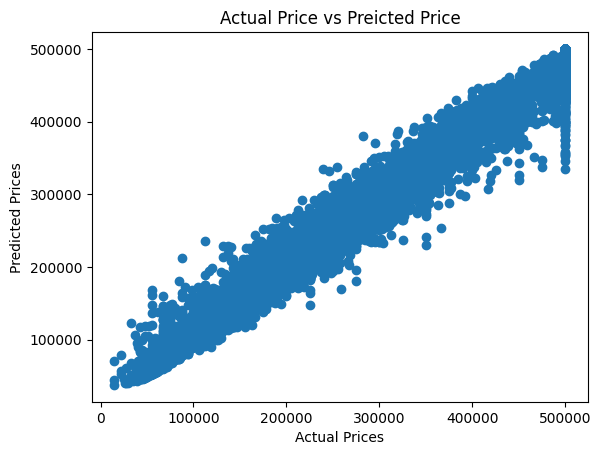

In [350]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

In [352]:
# accuracy for prediction on test data
test_data_prediction = mode6.predict(X_test_scaled)


In [353]:
# R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

#mean_squared_error
score_3 = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(score_3)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
print('Mean squared Error : ', score_3)
print('rmse : ', rmse)


R squared error :  0.6982944271728406
Mean Absolute Error :  43552.971375968984
Mean squared Error :  3953576914.180233
rmse :  62877.47541194886
